In [6]:
import tensorflow as tf

x1 = tf.constant(5)
x2 = tf.constant(6)

result = tf.multiply(x1,x2)
with tf.Session() as sess:
    output = sess.run(result)
    print(output)

30


In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [11]:

# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf.placeholders for the input and output of the network. Placeholders are
# variables which we need to fill in when we are ready to compute the graph.
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [15]:

pred = tf.add(tf.multiply(X, W), b)
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
learning_rate = 0.01

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.123391867 W= [0.37012333] b= [-0.0656156]
Epoch: 0100 cost= 0.118026540 W= [0.36295477] b= [-0.01404606]
Epoch: 0150 cost= 0.113281034 W= [0.3562127] b= [0.03445636]
Epoch: 0200 cost= 0.109083787 W= [0.3498715] b= [0.08007415]
Epoch: 0250 cost= 0.105371512 W= [0.34390748] b= [0.12297869]
Epoch: 0300 cost= 0.102088124 W= [0.3382982] b= [0.16333173]
Epoch: 0350 cost= 0.099184170 W= [0.33302253] b= [0.2012848]
Epoch: 0400 cost= 0.096615814 W= [0.3280606] b= [0.23698047]
Epoch: 0450 cost= 0.094344303 W= [0.3233938] b= [0.27055302]
Epoch: 0500 cost= 0.092335291 W= [0.31900442] b= [0.3021296]
Epoch: 0550 cost= 0.090558566 W= [0.31487626] b= [0.3318274]
Epoch: 0600 cost= 0.088987216 W= [0.31099358] b= [0.35975897]
Epoch: 0650 cost= 0.087597512 W= [0.30734187] b= [0.38603026]
Epoch: 0700 cost= 0.086368553 W= [0.30390713] b= [0.41073835]
Epoch: 0750 cost= 0.085281722 W= [0.300677] b= [0.43397614]
Epoch: 0800 cost= 0.084320582 W= [0.2976388] b= [0.45583272]
Epoch: 0850 cost= 

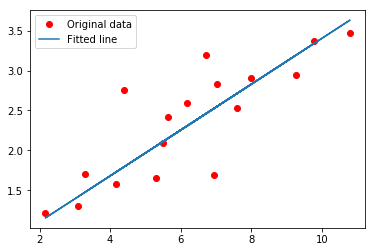

In [16]:
# %% We create a session to use the graph
n_epochs = 1000
display_step=50
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(n_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()